# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')

In [3]:
# # Algumas configurações para o matplotlib.
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

In [4]:
countries = pd.read_csv("countries.csv", decimal=',')

In [5]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [6]:
# Sua análise começa aqui.


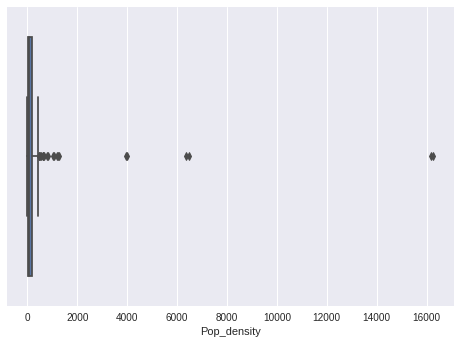

In [7]:
sns.boxplot(countries['Pop_density'])

In [8]:

columns_info = pd.DataFrame(index=countries.columns)
columns_info['dtypes'] = pd.DataFrame(countries.dtypes)
columns_info['Nulls'] = pd.DataFrame(countries.isnull().sum())

In [9]:
columns_info

,dtypes,Nulls
Country,object,0
Region,object,0
Population,int64,0
Area,int64,0
Pop_density,float64,0
Coastline_ratio,float64,0
Net_migration,float64,3
Infant_mortality,float64,3
GDP,float64,1
Literacy,float64,18


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [10]:
def q1():
    # Retorne aqui o resultado da questão 1.
    regions = countries['Region'].unique().tolist()
    list_regions = [ i.strip() for i in regions]
    list_regions.sort()
    return list_regions


## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [11]:
def q2():
    # Retorne aqui o resultado da questão 2.
    from sklearn.preprocessing import KBinsDiscretizer
    kbd_ = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    pop_dense_kbd = kbd_.fit_transform(countries['Pop_density'].values.reshape(-1, 1))
    
    countries['pop_dense_kbd'] = pop_dense_kbd
    quantile = np.quantile(a=countries['pop_dense_kbd'], q=0.9)
    bigger = countries[countries['pop_dense_kbd'] > quantile]
    
    return(bigger.shape[0])

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [12]:
# def q3():
#     # Retorne aqui o resultado da questão 3.
#     climate = pd.get_dummies(countries['Climate'].fillna(-1))
#     regions = pd.get_dummies(countries['Region'])
#     new_dataframe = pd.concat([climate, regions], axis=1)
#     return new_dataframe.shape[1]

In [13]:
def q3():
    return 18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [14]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [15]:

def q4():
     # Retorne aqui o resultado da questão 4.
    
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler 
    from sklearn.pipeline import Pipeline
    
    columns_info = pd.DataFrame(index=countries.columns)
    columns_info['dtypes'] = pd.DataFrame(countries.dtypes)

    columnsUse = columns_info[(columns_info['dtypes'] == 'int64') |( columns_info['dtypes'] == 'float64')].index
    

    pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('stand', StandardScaler())])
    #pipe.fit(countries[columnsUse])
    new_df = pipe.fit_transform(countries[columnsUse])
    new_country = pd.DataFrame(test_country).T
    new_country.columns = countries.columns
    
    new_test = pipe.transform(new_country[columnsUse])
    new_test = pd.DataFrame(new_test, columns=columnsUse)
    arable_value = new_test['Arable']
#     countries['Arable'] = countries['Arable'].fillna(countries['Arable'].median())
#     arable_std = float((new_country['Arable'] - countries['Arable'].mean()) / countries['Arable'].std())
    
    arable_value = round(arable_value, 3)
    
    return float(arable_value.round(3))


## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [16]:

countries["Net_migration"].isna().sum()
net_migration = countries["Net_migration"]
net_migration[:10]
def q5():
    # Retorne aqui o resultado da questão 4.
    q3, q1 = net_migration.quantile(0.75), net_migration.quantile(0.25) 
    IQR =  q3 - q1
    top_outliers = countries.query(f"Net_migration > {q3 + 1.5*IQR}").shape[0]
    lower_outliers = countries.query(f"Net_migration < {q1 - 1.5*IQR}").shape[0]    
    return (lower_outliers, top_outliers, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [17]:
def q6():
    # Retorne aqui o resultado da questão 4.
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.datasets import fetch_20newsgroups
    categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
    newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

    df = pd.DataFrame(newsgroup['data'])
    cv = CountVectorizer()
    data = cv.fit_transform(df[0])
    df_cols = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
    phone_sum = df_cols["phone"].sum()
    return phone_sum

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)


In [25]:
pd.DataFrame(newsgroup['data'])[0][242]

'From: nfotis@ntua.gr (Nick C. Fotis)\nSubject: (17 Apr 93) Computer Graphics Resource Listing : WEEKLY [part 1/3]\nLines: 1566\nReply-To: nfotis@theseas.ntua.gr (Nick (Nikolaos) Fotis)\nOrganization: National Technical Univ. of Athens\n\nArchive-name: graphics/resources-list/part1\nLast-modified: 1993/04/17\n\n\nComputer Graphics Resource Listing : WEEKLY POSTING [ PART 1/3 ]\n===================================================\nLast Change : 17 April 1993\n\nMany FAQs, including this Listing, are available on the archive site\npit-manager.mit.edu (alias rtfm.mit.edu) [18.172.1.27] in the directory\npub/usenet/news.answers.  The name under which a FAQ is archived appears\nin the Archive-name line at the top of the article.\nThis FAQ is archived as graphics/resources-list/part[1-3]\n\nThere\'s a mail server on that machine. You send a e-mail message to\nmail-server@pit-manager.mit.edu  containing the keyword "help" (without\nquotes!) in the message body.\n\nYou can see in many other pl

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [18]:
def q7():
    # Retorne aqui o resultado da questão 4.
    from sklearn.datasets import fetch_20newsgroups
    from sklearn.feature_extraction.text import TfidfVectorizer
    categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
    newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
    #from sklearn.feature_extraction.text import CountVectorizer

    
    df = pd.DataFrame(newsgroup['data'])
    tfidf = TfidfVectorizer()
    data = tfidf.fit_transform(df[0])
    df_cols = pd.DataFrame(data.toarray(), columns=tfidf.get_feature_names())
    phone_tfidf = df_cols["phone"].sum()
    return round(phone_tfidf, 3)